# What are the most common programming languages used in Saudi Arabia?
A data analysis using Stackoverflow’s 2020 and 2021 Annual Developer Survey.

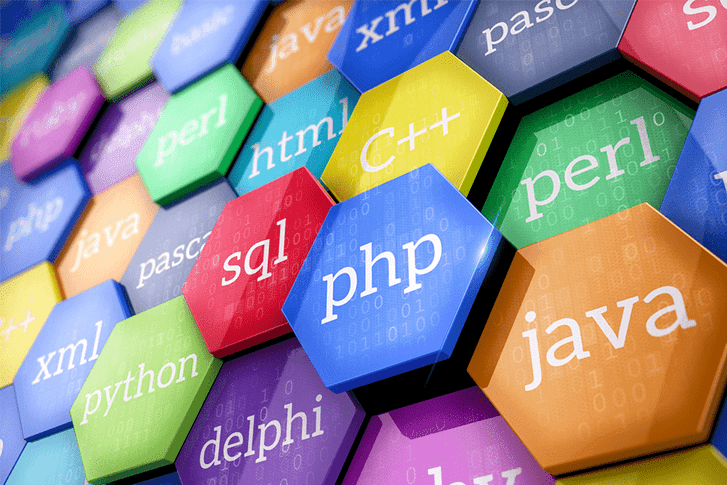

# Each stage of the CRISP-DM process. These stages are:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results

# Business Understanding
In this notebook, I will be exploring the 2020 and 2021 Stack Overflow results in order to gain some information on professional developers and what to focus on to have the best career in Saudi Arabia.

There will be three questions I will seek to answer in order to get this information:

1. What Programming Languages are most used to work and Which Programming Languages are most Required in Stackoverflow survey data of 2020 and 2021 ?
2. How does Programming Languages used at work relates with Programming Languages, People Wants to Learn in Saudi Arabia According to Stackoverflow survey data of 2020 and 2021?
3. What are the most wanted Programming Languages in Saudi Arabia According to Stackoverflow survey data of 2020 and 2021?

# Introduction:
With the advent of new areas in Saudi Arabia such as Artificial Intelligence and Data Science, many programming languages that were poorly known and used are now experiencing a rise in popularity.

In this article, we are going to analyze real data to verify if these programming languages are really being used Saudi Arabia or if they are just rumors.

For this, we are going to use data from Stackoverflow’s 2020 and 2021 Annual Developer Survey.

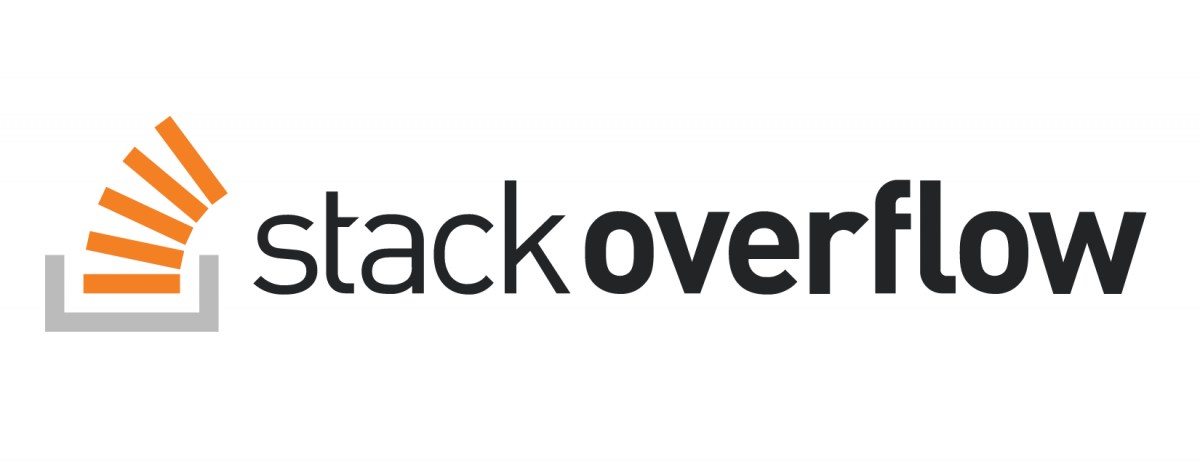

Every year, Stack Overflow conducts a massive survey of people on it’s website, covering all sorts of information like programming languages, jobs, education and more.

There were more than 150 questions as a part of the survey, including:

###### “What frameworks do you work with?”
###### “Do you program as a hobby or contribute to open source projects?”
###### “What IDE do you work with?”

# Data Understanding
In order to gain some understanding of the data. I have to do these steps:

- Handle categorical and missing data
- Analyze, Model, and Visualize

In [1]:
# to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# to change plot style
sns.set(style="darkgrid")

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Stackoverflow survey data
df_2020 = pd.read_csv('survey_results_public_2020.csv')
df_2021 = pd.read_csv('survey_results_public_2021.csv')

In [3]:
# showing the header of the 2020 data
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [4]:
# showing the header of the 2021 data
df_2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

# Part 1: What programming languages are most used to work in Saudi Arabia?

# Prepare Data

In [5]:
def filter_country(df, column_filter, country, columns):
    '''
    Filter a dataframe by country, returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by Saudi Arabia and selecting some columns.
saudi_2020 = filter_country(df_2020, 'Country', 'Saudi Arabia', ['LanguageWorkedWith', 'LanguageDesireNextYear'])
saudi_2021 = filter_country(df_2021, 'Country', 'Saudi Arabia', ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])


In [6]:
def split_column(df, column):
    ''' 
    Split column by (;), returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

# Splitting the Data Frame by column into a Series. 
worked_lang_2020 = split_column(saudi_2020, 'LanguageWorkedWith')
wanted_lang_2020 = split_column(saudi_2020, 'LanguageDesireNextYear')

worked_lang_2021 = split_column(saudi_2021, 'LanguageHaveWorkedWith')
wanted_lang_2021 = split_column(saudi_2021, 'LanguageWantToWorkWith')

In [7]:
def disarray(array_list):
    ''' 
    Flat a nested list, returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_worked_languages_2020 = disarray(worked_lang_2020)
list_wanted_languages_2020 = disarray(wanted_lang_2020)

list_worked_languages_2021 = disarray(worked_lang_2021)
list_wanted_languages_2021 = disarray(wanted_lang_2021)

In [8]:
def group_list(data_list, year):
    ''' 
    Group by count to a list, returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_worked_languages_2020 = group_list(list_worked_languages_2020, '2020')
dict_wanted_languages_2020 = group_list(list_wanted_languages_2020, '2020')

dict_worked_languages_2021 = group_list(list_worked_languages_2021, '2021')
dict_wanted_languages_2021 = group_list(list_wanted_languages_2021, '2021')

# Data Modelling

In [9]:
def create_dataframe(data_dicts):
    ''' 
    Create two dataframes and append them, returns the appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])

    df = df1.append(df2)
    
    return df

# Creating a Data Frame appending the data.
worked_languages = create_dataframe([dict_worked_languages_2020, dict_worked_languages_2021])
wanted_languages = create_dataframe([dict_wanted_languages_2020, dict_wanted_languages_2021])

In [10]:
def percentage(df, column):
    ''' 
    Scale data, returns the data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series

# Calculating the percentage
worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

In [11]:
# Geting the top 10 languages
top_10_worked_lang = worked_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()
top_10_wanted_lang = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()

worked_lang_chart = worked_languages[worked_languages['Programming Language'].isin(top_10_worked_lang)]
wanted_lang_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_10_worked_lang)]

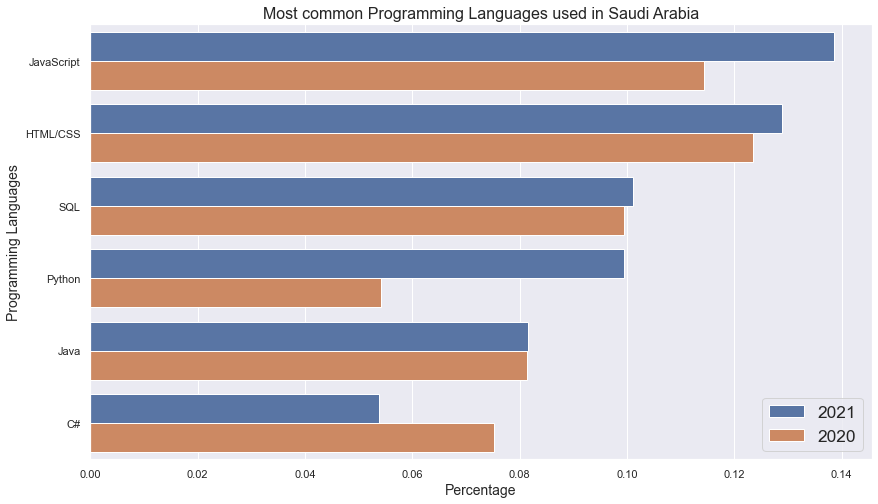

In [12]:
# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages used in Saudi Arabia', size = 16)
plt.show()

# Evaluate the Results
- We can see that classic languages like: **JavaScript**, **HTML/CSS**, **SQL** are still in the top positions.

- We can see that in 2021 two programming languages have risen such as JavaScript and Python, they  become the 1st and 4th respectively.

# Part 2:  What are the most wanted programming languages in Saudi Arabia?

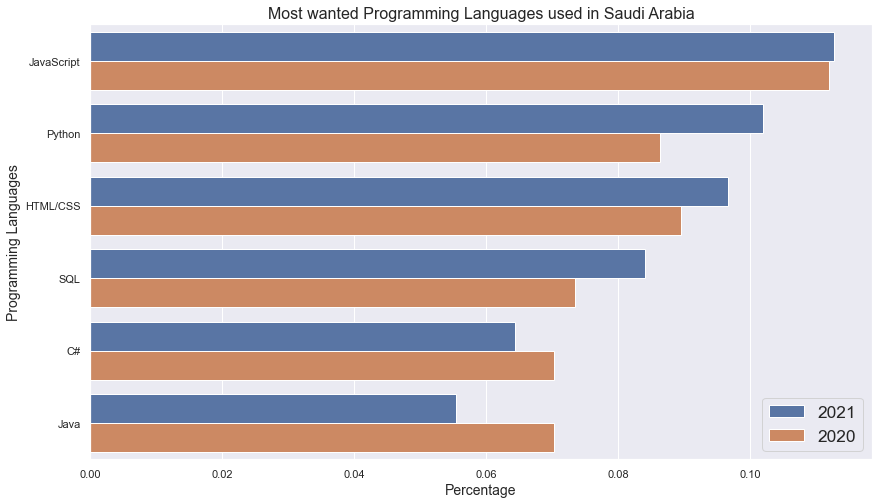

In [13]:
# Figure 2 — Percentage of desire of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = wanted_lang_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in Saudi Arabia', size = 16)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

# Evaluate the Results
We can see that **Python** have grown tremendously close to other languages. This is probably happening because its’s a programming language that is very versatile and has been used extensively in data related areas.

Most of the programming languages that have appeared as programming languages most used at work, also appeared in the ranking of most wanted programming languages, this show us that are many people wanting to learn these languages.

# Part 3: How does programming languages used at work relates with programming languages people want to learn?

By looking at the raw data, we can spot some patterns such as for people that use python at work, for example, python is also cited as language that those people wanted to learn in the next year.

A natural question arise:

**“The pattern observed for python holds for the other languages?”**

To address this question, we built a heat map that indicate how the work programming languages were related to the desired programming languages. The darker the position gets, the more related the programming language is.

# Prepare Data

In [14]:
# Grouping data to create a new dataframe

rows = []
for itens in list(zip(worked_lang_2021, wanted_lang_2021)):
    for i in itens[0]:
        rows.append({
            'Worked_PL': i, 
            'Wanted_PL': Counter(itens[0])
        })
        
programming_language_transition = pd.DataFrame(rows).groupby('Worked_PL').agg({'Wanted_PL': 'sum'}).reset_index()

# Data Modeling

In [15]:
# Creating a matrix

for row in programming_language_transition['Worked_PL']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_PL']).items()])
    for key, value in dict(row['Wanted_PL']).items():
         programming_language_transition[key].loc[index] = (value / total)

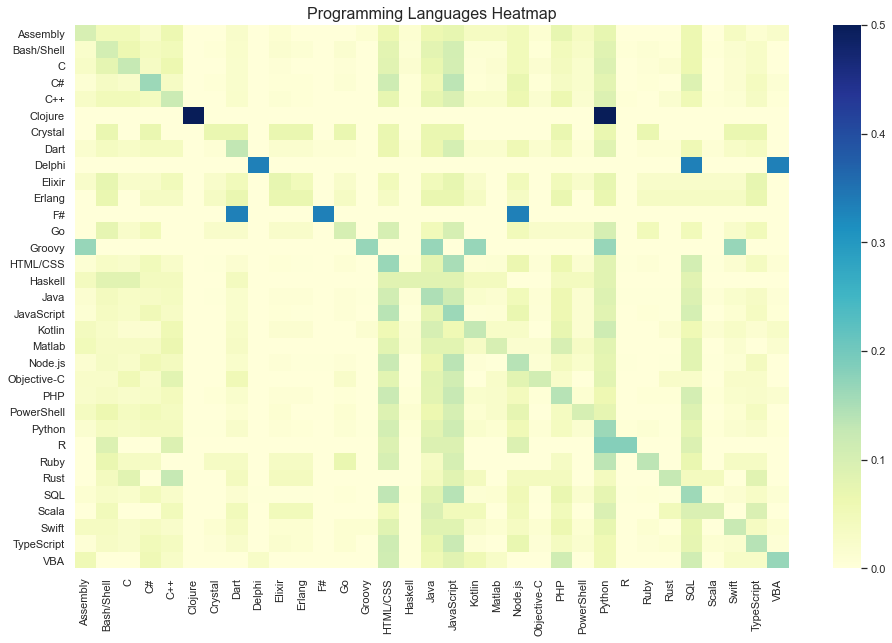

In [16]:
## Figure 3 — Percentage of relationship of work programming languages and desire programming 
## languages in 2020 and 2021.

matrix = programming_language_transition.drop('Wanted_PL', axis=1)\
                                        .set_index('Worked_PL')

plt.figure(figsize=(16, 10))
sns.heatmap(matrix, cmap="YlGnBu")
plt.title('Programming Languages Heatmap', size = 16)
plt.ylabel('')
plt.show()

# Evaluate the Results
With this figure we can have two insights:

1. As is evidenced by the diagonal line, people who already work with a programming language have a strong probability of wanting to learn the same programming language.

2. People who work with a programming language of a specific area, tend to want to learn programming languages of the same area. For example: **HTML/CSS** is strongly correlated with **JavaScript**.

# Conclusion

In this article, we took a look at what were the most popular and most biased programming languages, according to Stackoverflow’s 2020 and 2021 Annual Developer Survey data.

1. We have seen that some older programming languages such as **JavaScript**, **HTML/CSS**, **SQL** still dominates.
2. Younger programming languages like Python have been well-deserved to be learned, but some of the oldest ones still have their value and are being much demanded.
3. People who already work with a certain programming language have a tendency to learn that language or related languages within correlated areas to improve their own skill.

To see more about this analysis, see the link to my medium post available [here](https://medium.com/@alsgmany9109/what-are-the-most-common-programming-languages-used-in-saudi-arabia-b15e549c030d).

# References
1. [Stackoverflow Developer Survey Data](https://insights.stackoverflow.com/survey).
2. [Medium Blog](https://medium.com/@alsgmany9109/what-are-the-most-common-programming-languages-used-in-saudi-arabia-b15e549c030d).